This notebook will give you a chance to practice your new NumPy and Matplotlib skills through structured examples. We've covered a lot in the last few weeks, so don't be afraid to reference older notebooks or look things up if you don't remember. In fact, we're at a point where it becomes hard to teach Python in a general way. NumPy has hundreds of functions with seemingly endless use cases. Matplotlib is customizable beyond your wildest dreams. And those are only 2 packages. For any given problem you work with, you'll likely need to learn new packages and functions. With that in mind, there will be things in this notebook that are best done via functions we have not explicitly covered. You are going to need to use the resources at your disposal--us instructors, the internet, even AI--to work out solutions.

## Exercise 1 -- Integration

This one is pretty simple. Your goal is to write a code that can take the integral of a function. You can either give it a function explicitly or in the form of an array of x and y values. In either case, you should write code to integrate using rectangles and trapezoids. Remember, an integral is just an area under a curve, so you all you need to do is compute a total area given some complicated boundary. 

This can be done with regular Python loops or with NumPy vectorization. I recommend you try the NumPy way, but the full loop version might help you along if you're stuck because you'll have to write out all the nuts and bolts yourself. 

You can either check your results against analytical integrals you can do by hand or using scipy.integrate.quad.

In [ ]:
## Let's set up our imports ##


## We can put our integration code inside a function so we can easily call it ##
## Let's start with rectangular integration ##
## Set up your function here ##

#### What should the inputs to the function be? 
#### What is it going to return?

#### Remind yourself how rectangular integration works #####
#### To compute the area under the curve, we divide the interval into many small pieces.
#### We can then use the width of the pieces and their height to get a bunch of small
#### areas. When we add up those pieces, we should get the total area, i.e. the integral.

#### So our answer should look something like repeated addition.
#### Try starting with just 1 sub-interval (the whole interval).
#### Write out the code to compute the area of a rectangle with the full interval width
#### and a height defined by some point on the curve, could be the beginning, end, or 
#### middle of the interval, for example.

#### Now try to do the same thing but with smaller intervals and adding up the results. 



## Once you have your function worked out, don't forget to return the answer.



## Now set up another function for trapezoidal integration.
## This is different because now instead of approximating the function as constant,
## i.e. flat, across our small sub-intervals, we'll approximate it with a line
## with some slope. 

In [ ]:
## Now test your functions! ##
## Which is more accurate for a given number of sub-intervals? ##

## Exercise 2 -- Generating Random Samples

We've seen how to get random numbers already. But so far, we've only been able to sample numbers uniformly. That is, we've only done sampling where all numbers are equally likely to be chosen. But this is rarely realistic. In fact, many real random processes tend to follow a Gaussian distribution. Your goal is to create a sample that is distributed as a Gaussian. 

Let's talk about the algorithm first. Recall that the Gaussian distribution is expressed as 

$$ G(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{(x - \mu)^2}{2 \sigma^2}} $$

Let's start by just plotting this function to remember what it looks like.

In [ ]:
## Make sure pyplot is imported
from matplotlib import pyplot as plt

# Remember we need to give Pyplot x and y values. 
# How do we make x?
x = 

# How do we make y if we want y to be G(x) above
# Keep in mind that G(x) has two free parameters!
g = 

# Use a simple plot function to visualize the distribution


plt.show()

In [ ]:
# Now trying showing distributions with different parameters on the same plot to see what the
# parameters control. 

plt.show()

### If you want a little something extra, check that G(x) is properly 
### normalized using your integration function from Exercise 1

Now let's just generate random numbers like we have before. Generate 1000 random numbers and plot their distribution. You can use whatever interval you like.

In [ ]:
# Generate the random numbers. Let's use numpy.random for this.
# What goes in the parentheses?
uniform = np.random.random(...)

# Now plot the distribution
# Wait, how do we plot a distribution?
# Does it work if we just give Pyplot the numbers we just generated?
plt.plot(...)
plt.show()


In [ ]:
# If not, are the numbers we generated the x or the y?
# Well, a distribution is just a fancy histogram, right?
# So, let's use a histogram. Pyplot actually has a histogram 
# function built in so let's start there.
# Check out the docs to see how to use it.

plt.hist(...)

plt.show()

You should see that you indeed created a flat distribution.
Now how can we make a Gaussian?

Let's do it 3 ways.


### 1. Rejection Sampling
First, we'll use a simple geometric technqiue. We can turn our uniform random sample into a Gaussian random sample by adding another layer of sampling. The idea is that we draw a box around the target distribution and only keep samples that fall under the curve. For each x value in our distribution, we uniformly sample another number as the y value. If the sampled y value is greater than the distribution at the cooresponding x, then we discard it. We keep our values that get a random value falling under the curve. This might make more sense visually.

In the plot below, we sample uniform values in x and y within the window. If the y(x) < f(x), then keep the x value for our final sample. In other words, we keep the x values of pairs that fall in the green region, and we discard x values of pairs that fall in the red region.

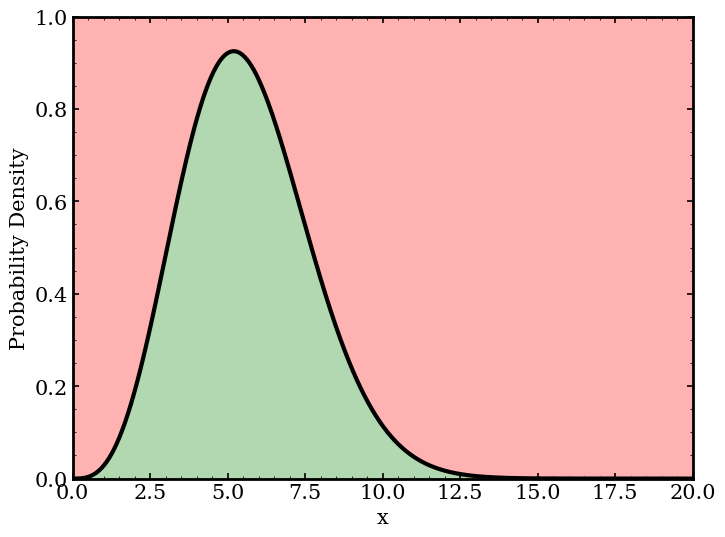

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
x_max = np.linspace(0, 20, 1000)
a_max = 3
maxwell = np.sqrt(2/np.pi) * x_max**3 / a_max**3 * np.exp(-x_max**2/2/a_max**2)
plt.plot(x_max, maxwell, c='k')
plt.fill_between(x_max,np.zeros_like(x_max),maxwell, color='g', alpha=0.3)
plt.fill_between(x_max,maxwell, np.ones_like(x_max), color='r', alpha=0.3)
plt.autoscale(enable=True, tight=True)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Maxwell-Boltzmann Distribution")
plt.show()


In [ ]:
## Try creating a Gaussian distributed sample using the rejection technique.

## Plot your distribution (remember histograms) on the same plot as the analytical Gaussian distribution
## to show that you succeeded in creating a Gaussian sample.

### 2. Inverse CDF sampling

The Gaussian distribution we've looked at so far has been the probability density function (pdf), but there are other descriptions we could use. The cumulative distribution function (cdf) is defined as $F(a) = \int_{-\infty}^a f(x) dx$. In other words it's the total probability of observing a value smaller than x. Naturally, this value is bounded between 0 and 1 (it's a probability). It's also monotonic (always increasing because the pdf is never negative), which means it gives us a 1-1 mapping between the domain of the distribution and the interval [0,1]. So, if we can take the inverse of the cdf, we can convert values that we sample uniformly between 0 and 1 back to original domain.

### 3. NumPy

As usual, this is something that NumPy can already do by default. Look at the normal function in NumPy's random module (https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Just like you can create a uniform random sample using random.random, you can easily make a sample that follows any of the many distributions that they have implemented.